In [66]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt

network = np.loadtxt(open("network.csv", 'rb'), delimiter=',')
requests = np.loadtxt(open("requests.csv", 'rb'), delimiter=',')
requests_week_ten = np.genfromtxt(open("supplementpickups.csv", 'rb'), delimiter=',')
#print(network)
#print(len(network))
#print(len(requests))
#print(requests)
#print(requests_week_ten)

[[2.000e+00 4.000e+01 2.000e+00]
 [3.000e+00 2.500e+01 5.000e+01]
 [4.000e+00 2.300e+01 5.000e+00]
 [7.000e+00 1.700e+01 4.600e+01]
 [9.000e+00 3.000e+00 1.200e+01]
 [1.900e+01 3.500e+01 4.100e+01]
 [2.000e+01 1.000e+00 3.100e+01]
 [2.600e+01 2.200e+01 1.400e+01]
 [3.800e+01 4.500e+01 3.300e+01]
 [4.200e+01 1.000e+00 4.500e+01]
 [4.200e+01 2.600e+01 2.000e+01]
 [4.400e+01 3.800e+01 4.400e+01]
 [4.400e+01 3.400e+01 4.600e+01]
 [5.100e+01 1.000e+01 4.600e+01]
 [5.700e+01 5.000e+01 4.500e+01]
 [6.700e+01 4.500e+01 1.100e+01]
 [6.800e+01 3.500e+01 1.000e+00]
 [7.000e+01 6.000e+00 5.000e+00]
 [7.100e+01 4.400e+01 3.600e+01]
 [7.400e+01 4.600e+01 1.600e+01]
 [7.600e+01 4.600e+01 1.100e+01]
 [8.100e+01 2.900e+01 6.000e+00]
 [8.300e+01 2.100e+01 1.900e+01]
 [8.400e+01 6.000e+00 1.700e+01]
 [8.500e+01 2.800e+01 3.100e+01]
 [9.200e+01 2.300e+01 1.000e+00]
 [9.600e+01 3.200e+01 5.000e+00]
 [9.700e+01 1.100e+01 2.800e+01]
 [1.000e+02 3.200e+01 4.900e+01]
 [1.070e+02 4.900e+01 3.900e+01]
 [1.100e+0

In [3]:
def format_graph(network):
    for i in range(len(network)):
        for k in range(len(network)):
            if (network[i][k]==0):
                network[i][k] = math.inf
        network[i][i] = 0
    return network

In [4]:
def floyd_warshall(network):
    dist = format_graph(network)
    for k in range (len(dist)):
        for i in range (len(dist)):
            for j in range (len(dist)):
                if (dist[i][j] > (dist[i][k]+dist[k][j])): 
                    dist[i][j] = dist[i][k]+dist[k][j]
    return dist

In [5]:
def waiting_time(num_drivers,graph,requests):
    
    # This sets up an array that stores total waiting time for each uber, 
    # their location, and the time they will complete their current trip. 
    # The idea is at the end I can sum all of the waiting times of each uber and get total wait time. 
        
    drivers = np.zeros((num_drivers,3)) 
    num_requests = 0
    total_wait_time = 0
    graph = floyd_warshall(graph)
    if(num_drivers>len(requests)):# fixes index out of bounds issue
        num_drivers=len(requests) 
        
    # Assuming that ubers start at the location of their
    # first pickup. Thus I update the cars locations
    # to the ending point of that trip and waiting
    # time is not increased
    while(num_drivers>num_requests):
        drivers[num_requests][1] = requests[num_requests][2]-1
        drivers[num_requests][2] = requests[num_requests][0]+graph[int(requests[num_requests][1])-1][int(requests[num_requests][2])-1]
        num_requests += 1
    while(num_requests<len(requests)-1):
        
        # This loop determines which driver is closest (time wise) to the next request
        for i in range(num_drivers):
            if i==0:
                min_index = i
                if(drivers[i][2]>requests[num_requests][0]): #driver finishes current trip after next request
                    min_wait_time = drivers[i][2]-requests[num_requests][0]+graph[int(drivers[i][1])][int(requests[num_requests][1])-1]
                else: 
                    min_wait_time = graph[int(drivers[i][1])][int(requests[num_requests][1])-1]
                    
            elif (drivers[i][2]>requests[num_requests][0]):
                if(min_wait_time>drivers[i][2]-requests[num_requests][0]+graph[int(drivers[i][1]-1)][int(requests[num_requests][1])-1]):
                    min_wait_time = drivers[i][2]-requests[num_requests][0]+graph[int(drivers[i][1])][int(requests[num_requests][1])-1]
                    min_index = i
            else:
                if(min_wait_time>graph[int(drivers[i][1])][int(requests[num_requests][1])-1]):
                    min_wait_time = graph[int(drivers[i][1])][int(requests[num_requests][1])-1]
                    min_index = i

        drivers[min_index][0] += min_wait_time #update wait time
        drivers[min_index][1] = requests[num_requests][2]-1 #update drivers destination
        drivers[min_index][2] = requests[num_requests][0]+min_wait_time+graph[int(requests[num_requests][1])-1][int(requests[num_requests][2])-1]
        num_requests += 1
    
    
    for i in range(num_drivers):
        total_wait_time += drivers[i][0]
    
    return total_wait_time

Text(0, 0.5, 'Total Wait Time')

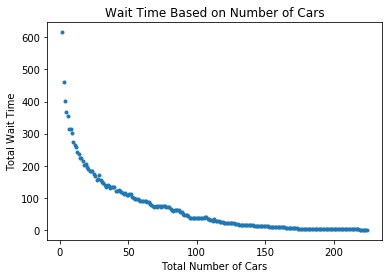

In [52]:
total_wait = []
num_cars = []

for i in range(2,225):
    total_wait.append(waiting_time(i,network,requests))
    num_cars.append(i)
    
plt.scatter(num_cars, total_wait, marker='.')
title = 'Wait Time Based on Number of Cars'
plt.title(title)
plt.xlabel('Total Number of Cars')
plt.ylabel('Total Wait Time')

502
223


In [58]:
def waiting_time_starting_at_zero(num_drivers,graph,requests):
    
    # This sets up an array that stores total waiting time for each uber, 
    # their location, and the time they will complete their current trip. 
    # The idea is at the end I can sum all of the waiting times of each uber and get total wait time. 
        
    drivers = np.zeros((num_drivers,3)) 
    num_requests = 0
    num_cars = 0
    total_wait_time = 0
    graph = floyd_warshall(graph)
    if(num_drivers>len(requests)):# fixes index out of bounds issue
        num_drivers=len(requests) 
        
    # Assuming that ubers start at the location of their
    # first pickup. Thus I update the cars locations
    # to the ending point of that trip and waiting
    # time is not increased
    while(num_drivers>num_cars):
        drivers[num_requests][1] = 0
        drivers[num_requests][2] = 0
        num_cars += 1
    while(num_requests<len(requests)-1):
        
        # This loop determines which driver is closest (time wise) to the next request
        for i in range(num_drivers):
            if i==0:
                min_index = i
                if(drivers[i][2]>requests[num_requests][0]): #driver finishes current trip after next request
                    min_wait_time = drivers[i][2]-requests[num_requests][0]+graph[int(drivers[i][1])][int(requests[num_requests][1])-1]
                else: 
                    min_wait_time = graph[int(drivers[i][1])][int(requests[num_requests][1])-1]
                    
            elif (drivers[i][2]>requests[num_requests][0]):
                if(min_wait_time>drivers[i][2]-requests[num_requests][0]+graph[int(drivers[i][1]-1)][int(requests[num_requests][1])-1]):
                    min_wait_time = drivers[i][2]-requests[num_requests][0]+graph[int(drivers[i][1])][int(requests[num_requests][1])-1]
                    min_index = i
            else:
                if(min_wait_time>graph[int(drivers[i][1])][int(requests[num_requests][1])-1]):
                    min_wait_time = graph[int(drivers[i][1])][int(requests[num_requests][1])-1]
                    min_index = i

        drivers[min_index][0] += min_wait_time #update wait time
        drivers[min_index][1] = requests[num_requests][2]-1 #update drivers destination
        drivers[min_index][2] = requests[num_requests][0]+min_wait_time+graph[int(requests[num_requests][1])-1][int(requests[num_requests][2])-1]
        num_requests += 1
    
    
    for i in range(num_drivers):
        total_wait_time += drivers[i][0]
    
    return total_wait_time

The total wait time for 2 drivers is: 284.0


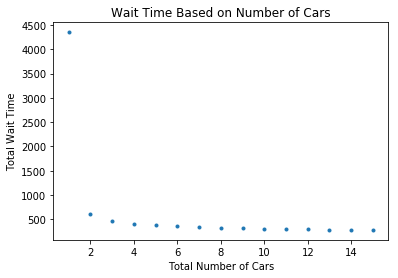

In [89]:
total_wait = []
num_cars = []
for i in range(1,16):
    total_wait.append(waiting_time_starting_at_zero(i,network,requests))
    num_cars.append(i)
    
plt.scatter(num_cars, total_wait, marker='.')
title = 'Wait Time Based on Number of Cars'
plt.title(title)
plt.xlabel('Total Number of Cars')
plt.ylabel('Total Wait Time')
print("The total wait time for 2 drivers is:",total_wait[13])

The total wait time for 2 drivers is: 306.0


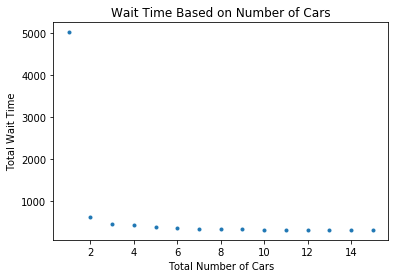

In [81]:
total_wait = []
num_cars = []
for i in range(1,16):
    total_wait.append(waiting_time_starting_at_zero(i,network,requests_week_ten))
    num_cars.append(i)
    
plt.scatter(num_cars, total_wait, marker='.')
title = 'Wait Time Based on Number of Cars'
plt.title(title)
plt.xlabel('Total Number of Cars')
plt.ylabel('Total Wait Time')
print("The total wait time for 2 drivers is:",total_wait[9])

The total wait time for 2 drivers and the initial list of requests is: 620.0
The total wait time for 2 drivers and the week ten list of requests is: 618.0


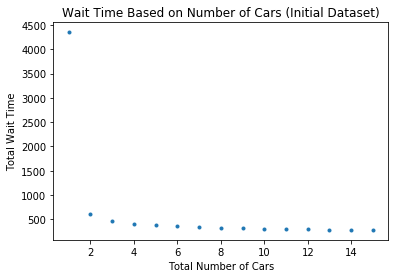

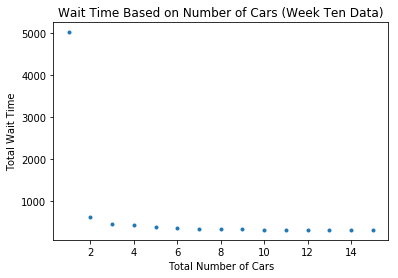

In [96]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt

network = np.loadtxt(open("network.csv", 'rb'), delimiter=',')
requests = np.loadtxt(open("requests.csv", 'rb'), delimiter=',')
requests_week_ten = np.genfromtxt(open("supplementpickups.csv", 'rb'), delimiter=',')

def format_graph(network):
    for i in range(len(network)):
        for k in range(len(network)):
            if (network[i][k]==0):
                network[i][k] = math.inf
        network[i][i] = 0
    return network

def floyd_warshall(network):
    dist = format_graph(network)
    for k in range (len(dist)):
        for i in range (len(dist)):
            for j in range (len(dist)):
                if (dist[i][j] > (dist[i][k]+dist[k][j])):
                    dist[i][j] = dist[i][k]+dist[k][j]
    return dist


def waiting_time_starting_at_zero(num_drivers, graph, requests):
    # This sets up an array that stores total waiting time for each uber,
    # their location, and the time they will complete their current trip.
    # The idea is at the end I can sum all of the waiting times of each uber and get total wait time.

    drivers = np.zeros((num_drivers, 3))
    num_requests = 0
    num_cars = 0
    total_wait_time = 0
    graph = floyd_warshall(graph)
    if (num_drivers > len(requests)):  # fixes index out of bounds issue
        num_drivers = len(requests)

        # Assuming that ubers start at the location of their
    # first pickup. Thus I update the cars locations
    # to the ending point of that trip and waiting
    # time is not increased
    while (num_drivers > num_cars):
        drivers[num_requests][1] = 0
        drivers[num_requests][2] = 0
        num_cars += 1
    while (num_requests < len(requests) - 1):

        # This loop determines which driver is closest (time wise) to the next request
        for i in range(num_drivers):
            if i == 0:
                min_index = i
                if (drivers[i][2] > requests[num_requests][0]):  # driver finishes current trip after next request
                    min_wait_time = drivers[i][2] - requests[num_requests][0] + graph[int(drivers[i][1])][
                        int(requests[num_requests][1]) - 1]
                else:
                    min_wait_time = graph[int(drivers[i][1])][int(requests[num_requests][1]) - 1]

            elif (drivers[i][2] > requests[num_requests][0]):
                if (min_wait_time > drivers[i][2] - requests[num_requests][0] + graph[int(drivers[i][1] - 1)][
                    int(requests[num_requests][1]) - 1]):
                    min_wait_time = drivers[i][2] - requests[num_requests][0] + graph[int(drivers[i][1])][
                        int(requests[num_requests][1]) - 1]
                    min_index = i
            else:
                if (min_wait_time > graph[int(drivers[i][1])][int(requests[num_requests][1]) - 1]):
                    min_wait_time = graph[int(drivers[i][1])][int(requests[num_requests][1]) - 1]
                    min_index = i

        drivers[min_index][0] += min_wait_time  # update wait time
        drivers[min_index][1] = requests[num_requests][2] - 1  # update drivers destination
        drivers[min_index][2] = requests[num_requests][0] + min_wait_time + graph[int(requests[num_requests][1]) - 1][
            int(requests[num_requests][2]) - 1]
        num_requests += 1

    for i in range(num_drivers):
        total_wait_time += drivers[i][0]

    return total_wait_time

def first_dataset(network,requests):
    total_wait = []
    num_cars = []
    for i in range(1, 16):
        total_wait.append(waiting_time_starting_at_zero(i, network, requests))
        num_cars.append(i)

    plt.scatter(num_cars, total_wait, marker='.')
    title = 'Wait Time Based on Number of Cars (Initial Dataset)'
    plt.title(title)
    plt.xlabel('Total Number of Cars')
    plt.ylabel('Total Wait Time')
    print("The total wait time for 2 drivers and the initial list of requests is:", total_wait[1])

def week_ten_dataset(network,requests_week_ten):
    total_wait = []
    num_cars = []
    for i in range(1, 16):
        total_wait.append(waiting_time_starting_at_zero(i, network, requests_week_ten))
        num_cars.append(i)
    plt.figure(2)
    plt.scatter(num_cars, total_wait, marker='.')
    title = 'Wait Time Based on Number of Cars (Week Ten Data)'
    plt.title(title)
    plt.xlabel('Total Number of Cars')
    plt.ylabel('Total Wait Time')
    print("The total wait time for 2 drivers and the week ten list of requests is:", total_wait[1])


first_dataset(network, requests)
week_ten_dataset(network, requests_week_ten)